### **Task 3: Experience Analytics**

#### **Step 1: Aggregate Network Parameters and Device Characteristics**
1. **Aggregate Customer Data**:
   - For each customer, calculate the following metrics, ensuring that missing values and outliers are treated (replace with mean or mode):
     - Average TCP retransmission.
     - Average Round Trip Time (RTT).
     - Handset type.
     - Average throughput.

#### **Step 2: Analyze TCP, RTT, and Throughput Values**
1. **Identify Extreme and Frequent Values**:
   - Compute and list the top 10, bottom 10, and most frequent values for:
     - TCP retransmission.
     - RTT.
     - Throughput.

#### **Step 3: Analyze Distributions by Handset Type**
1. **Distribution of Throughput per Handset Type**:
   - Compute the distribution of average throughput per handset type.
   - Interpret and report your findings, focusing on any trends or patterns.

2. **TCP Retransmission per Handset Type**:
   - Compute the average TCP retransmission per handset type.
   - Provide interpretations for your findings, noting any significant differences between handset types.

#### **Step 4: Perform k-Means Clustering on Experience Metrics**
1. **Run k-Means Clustering (k=3)**:
   - Use the experience metrics (TCP retransmission, RTT, throughput, handset type) to perform k-means clustering, segmenting users into three experience groups.

2. **Describe Clusters**:
   - Provide a brief description of each cluster, defining each group based on your understanding of the data (e.g., users with high throughput but high TCP retransmission).


In [1]:
import sys
import os
sys.path.append(os.path.abspath('../src'))


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

from sklearn.impute import SimpleImputer
from load_data import load_data_from_postgres, load_data_using_sqlalchemy


In [22]:
# Define your SQL query
query = "SELECT * FROM xdr_data;"  # Replace with your actual table name

# Load data from PostgreSQL
df = load_data_from_postgres(query)

# Display the first few rows of the dataframe
if df is not None:
    print("Successfully loaded the data")
else:
    print("Failed to load data.")


c:\Users\tedoa\KAIM-W2\src\load_data.py:66: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


Successfully loaded the data


In [23]:
# Display the first few rows of the dataset
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [5]:
# Define your SQL query
query = "SELECT * FROM xdr_data;"  # Replace with your actual table name

# Load data from PostgreSQL using SQLAlchemy
df = load_data_using_sqlalchemy(query)

# Display the first few rows of the dataframe
if df is not None:
    print("Successfully loaded the data")
else:
    print("Failed to load data.")

Successfully loaded the data


In [6]:
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [7]:
df.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


In [8]:
# Fill missing data only for numeric columns with mean values
df.fillna(df.select_dtypes(include=[np.number]).mean(), inplace=True)


In [9]:
# Fill missing values in non-numeric (categorical) columns with the most frequent value
df.fillna(df.select_dtypes(include=['object']).mode().iloc[0], inplace=True)


In [10]:
from sklearn.impute import SimpleImputer

# Separate numeric and non-numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
non_numeric_cols = df.select_dtypes(include=['object']).columns

# Impute missing numeric values with the mean
imputer = SimpleImputer(strategy='mean')
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])

# For non-numeric columns, you can fill with the most frequent value (mode) or a custom value
df[non_numeric_cols] = df[non_numeric_cols].fillna(df[non_numeric_cols].mode().iloc[0])

# Verify no more missing values
print(df.isnull().sum())


Bearer Id                                   0
Start                                       0
Start ms                                    0
End                                         0
End ms                                      0
Dur. (ms)                                   0
IMSI                                        0
MSISDN/Number                               0
IMEI                                        0
Last Location Name                          0
Avg RTT DL (ms)                             0
Avg RTT UL (ms)                             0
Avg Bearer TP DL (kbps)                     0
Avg Bearer TP UL (kbps)                     0
TCP DL Retrans. Vol (Bytes)                 0
TCP UL Retrans. Vol (Bytes)                 0
DL TP < 50 Kbps (%)                         0
50 Kbps < DL TP < 250 Kbps (%)              0
250 Kbps < DL TP < 1 Mbps (%)               0
DL TP > 1 Mbps (%)                          0
UL TP < 10 Kbps (%)                         0
10 Kbps < UL TP < 50 Kbps (%)     

In [12]:
#field_description = pd.read_csv('/kaggle/input/kaim-w2/Field Descriptions - Sheet1.csv')
#field_description

## Aggregate Network Parameters and Device Characteristics

In [13]:
# Task 3.1 - Aggregate the following experience metrics per customer ID (MSISDN)
experience_data = df.groupby('MSISDN/Number').agg({
    'TCP DL Retrans. Vol (Bytes)': 'mean',  # Average TCP DL retransmission
    'TCP UL Retrans. Vol (Bytes)': 'mean',  # Average TCP UL retransmission
    'Avg RTT DL (ms)': 'mean',              # Average RTT DL
    'Avg RTT UL (ms)': 'mean',              # Average RTT UL
    'Avg Bearer TP DL (kbps)': 'mean',      # Average throughput DL
    'Avg Bearer TP UL (kbps)': 'mean',      # Average throughput UL
    'Handset Type': 'first'                 # Handset type (first occurrence)
})

# Create combined columns for RTT, Throughput, and TCP Retransmission
experience_data['Avg RTT (ms)'] = (experience_data['Avg RTT DL (ms)'] + experience_data['Avg RTT UL (ms)']) / 2
experience_data['Avg Throughput (Mbps)'] = (experience_data['Avg Bearer TP DL (kbps)'] + experience_data['Avg Bearer TP UL (kbps)']) / 2000
experience_data['TCP Retransmission'] = (experience_data['TCP DL Retrans. Vol (Bytes)'] + experience_data['TCP UL Retrans. Vol (Bytes)']) / 2

# Display the aggregated experience data
print("Aggregated Experience Data Per User:")
experience_data.head()


Aggregated Experience Data Per User:


,TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),Handset Type,Avg RTT (ms),Avg Throughput (Mbps),TCP Retransmission
MSISDN/Number,,,,,,,,,,
3.360100e+10,2.080991e+07,759658.664811,46.000000,0.000000,37.0,39.0,Huawei P20 Lite Huawei Nova 3E,23.000000,0.0380,1.078479e+07
3.360100e+10,2.080991e+07,759658.664811,30.000000,1.000000,48.0,51.0,Apple iPhone 7 (A1778),15.500000,0.0495,1.078479e+07
3.360100e+10,2.080991e+07,759658.664811,109.795706,17.662883,48.0,49.0,undefined,63.729294,0.0485,1.078479e+07
3.360101e+10,1.066000e+03,759658.664811,69.000000,15.000000,204.0,44.0,Apple iPhone 5S (A1457),42.000000,0.1240,3.803623e+05
3.360101e+10,1.507977e+07,390430.332406,57.000000,2.500000,20197.5,8224.5,Apple iPhone Se (A1723),29.750000,14.2110,7.735101e+06


## Task 3.2 - Compute and list the top, bottom, and most frequent values

In [14]:
# Task 3.2 - Compute and list the top, bottom, and most frequent values
# Top 10 TCP retransmission values
top_tcp = experience_data['TCP Retransmission'].nlargest(10)
print("\nTop 10 TCP Retransmission Values:")
top_tcp


Top 10 TCP Retransmission Values:


MSISDN/Number
3.369858e+10    2.150739e+09
3.365871e+10    2.144060e+09
3.366491e+10    2.134324e+09
3.365863e+10    2.127330e+09
3.366613e+10    2.105629e+09
3.366877e+10    2.083297e+09
3.366131e+10    2.068969e+09
3.366240e+10    2.058902e+09
3.366682e+10    1.984060e+09
3.376264e+10    1.893435e+09
Name: TCP Retransmission, dtype: float64

In [15]:
# Bottom 10 TCP retransmission values
bottom_tcp = experience_data['TCP Retransmission'].nsmallest(10)
print("\nBottom 10 TCP Retransmission Values:")
bottom_tcp


Bottom 10 TCP Retransmission Values:


MSISDN/Number
3.365013e+10    48.5
3.361478e+10    64.0
3.376206e+10    64.5
3.362636e+10    67.0
3.360783e+10    71.5
3.365068e+10    88.0
3.376964e+10    88.0
3.378420e+10    88.5
3.367937e+10    89.5
3.369969e+10    91.0
Name: TCP Retransmission, dtype: float64

In [16]:
# Most frequent TCP retransmission values
most_frequent_tcp = experience_data['TCP Retransmission'].mode()
print("\nMost Frequent TCP Retransmission Values:")
print(most_frequent_tcp)



Most Frequent TCP Retransmission Values:
0    1.078479e+07
Name: TCP Retransmission, dtype: float64


In [17]:
# Similarly for RTT
top_rtt = experience_data['Avg RTT (ms)'].nlargest(10)
bottom_rtt = experience_data['Avg RTT (ms)'].nsmallest(10)
most_frequent_rtt = experience_data['Avg RTT (ms)'].mode()

print("\nTop 10 RTT Values:")
print(top_rtt)
print("\nBottom 10 RTT Values:")
print(bottom_rtt)
print("\nMost Frequent RTT Values:")
print(most_frequent_rtt)



Top 10 RTT Values:
MSISDN/Number
3.366232e+10    48462.00
3.368369e+10    27424.00
3.366087e+10    16167.50
3.376094e+10    13639.00
3.360679e+10    13150.00
3.367182e+10    12857.50
3.378187e+10    12694.00
3.378401e+10    12369.00
3.369855e+10    11505.25
3.362963e+10    10490.00
Name: Avg RTT (ms), dtype: float64

Bottom 10 RTT Values:
MSISDN/Number
3.365298e+10    0.0
3.366158e+10    0.0
3.366020e+10    1.0
3.369505e+10    2.0
3.365949e+10    2.5
3.366862e+10    3.0
3.364768e+10    4.0
3.361085e+10    4.5
3.367220e+10    4.5
3.363468e+10    5.0
Name: Avg RTT (ms), dtype: float64

Most Frequent RTT Values:
0    63.729294
Name: Avg RTT (ms), dtype: float64


## Task 3.3 - Analyze distribution of average throughput per handset type

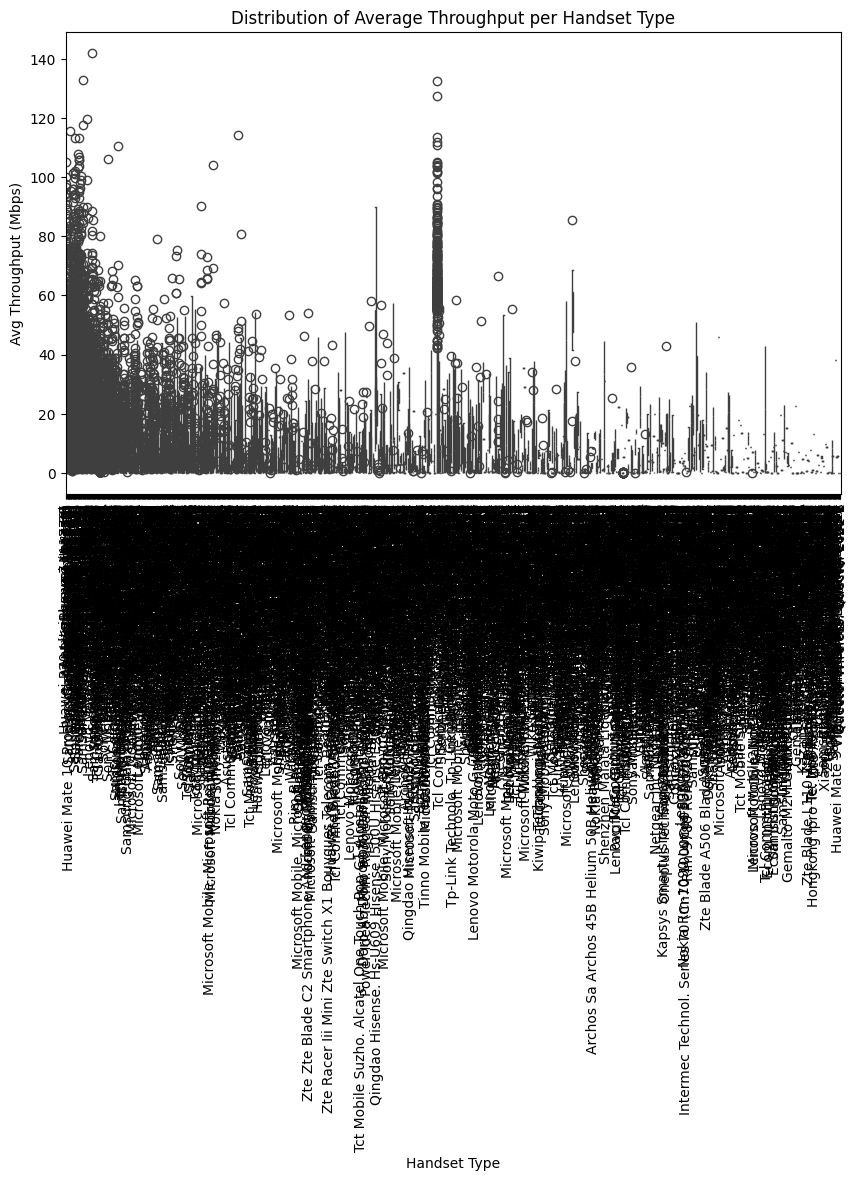

In [18]:
# Task 3.3 - Analyze distribution of average throughput per handset type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Handset Type', y='Avg Throughput (Mbps)', data=experience_data)
plt.xticks(rotation=90)
plt.title('Distribution of Average Throughput per Handset Type')
plt.show()


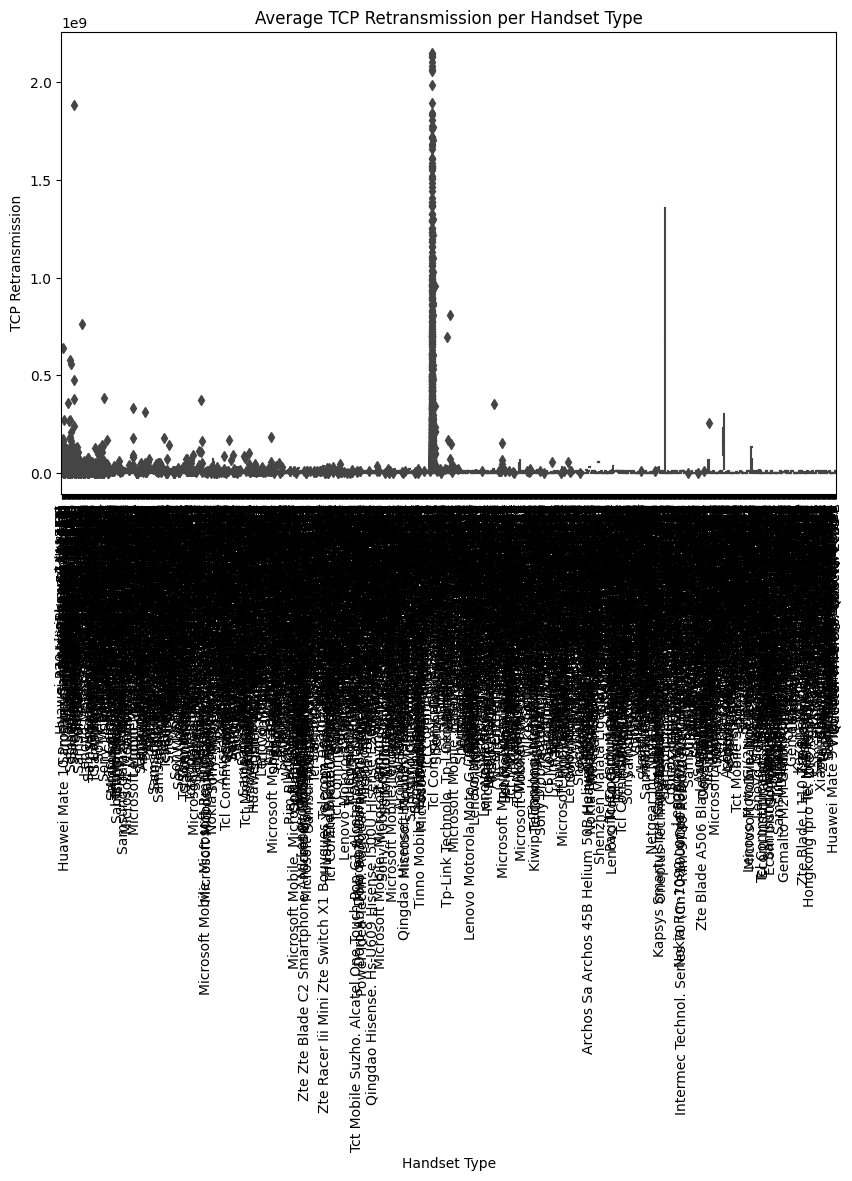

In [32]:
# Analyze average TCP retransmission per handset type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Handset Type', y='TCP Retransmission', data=experience_data)
plt.xticks(rotation=90)
plt.title('Average TCP Retransmission per Handset Type')
plt.show()


## Task 3.4 - K-means clustering to segment users based on experience metrics

In [19]:
# Task 3.4 - K-means clustering to segment users based on experience metrics
# Normalize the experience data (TCP Retransmission, RTT, Throughput)
experience_metrics = experience_data[['TCP Retransmission', 'Avg RTT (ms)', 'Avg Throughput (Mbps)']]
scaler = MinMaxScaler()
normalized_experience_data = scaler.fit_transform(experience_metrics)

# Apply K-means clustering (k=3)
kmeans = KMeans(n_clusters=3, random_state=42)
experience_data['Experience Cluster'] = kmeans.fit_predict(normalized_experience_data)

# Display experience clusters
print("\nExperience Clusters:")
print(experience_data[['TCP Retransmission', 'Avg RTT (ms)', 'Avg Throughput (Mbps)', 'Experience Cluster']].head())



Experience Clusters:
               TCP Retransmission  Avg RTT (ms)  Avg Throughput (Mbps)  \
MSISDN/Number                                                            
3.360100e+10         1.078479e+07     23.000000                 0.0380   
3.360100e+10         1.078479e+07     15.500000                 0.0495   
3.360100e+10         1.078479e+07     63.729294                 0.0485   
3.360101e+10         3.803623e+05     42.000000                 0.1240   
3.360101e+10         7.735101e+06     29.750000                14.2110   

               Experience Cluster  
MSISDN/Number                      
3.360100e+10                    0  
3.360100e+10                    0  
3.360100e+10                    0  
3.360101e+10                    0  
3.360101e+10                    1  


In [20]:
# Interpret the clusters
experience_cluster_stats = experience_data.groupby('Experience Cluster').agg({
    'TCP Retransmission': ['mean', 'min', 'max'],
    'Avg RTT (ms)': ['mean', 'min', 'max'],
    'Avg Throughput (Mbps)': ['mean', 'min', 'max']
})

print("\nExperience Cluster Statistics (Mean, Min, Max):")
print(experience_cluster_stats)



Experience Cluster Statistics (Mean, Min, Max):
                   TCP Retransmission                      Avg RTT (ms)  \
                                 mean    min           max         mean   
Experience Cluster                                                        
0                        8.812973e+06   64.0  9.551905e+08    71.764409   
1                        9.045308e+06   48.5  2.150739e+09    56.348998   
2                        3.809611e+07  461.0  2.144060e+09    47.180367   

                                    Avg Throughput (Mbps)                     
                      min       max                  mean      min       max  
Experience Cluster                                                            
0                    0.00  48462.00              1.124908   0.0000    9.3015  
1                    8.75   4148.25             17.455383   9.3040   30.0165  
2                   10.50   1477.50             42.272099  22.8705  141.9655  


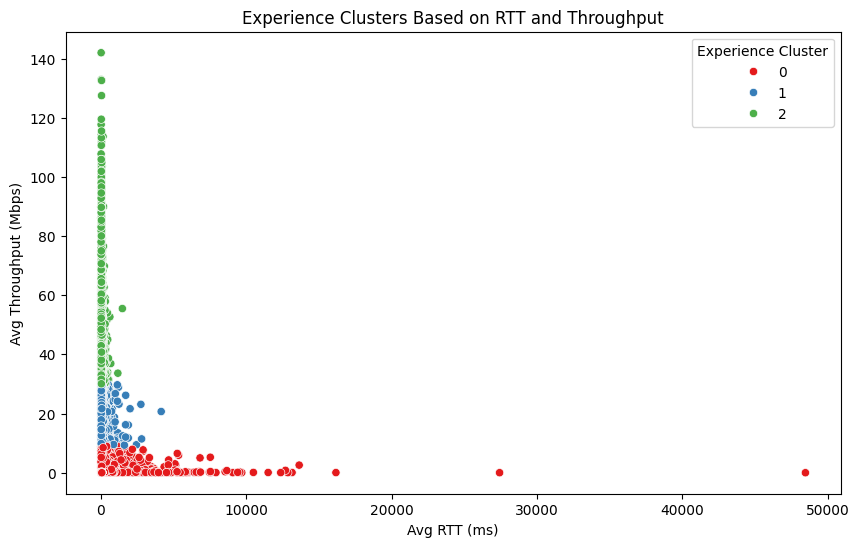

In [21]:
# Visualize the distribution of clusters using Throughput and RTT as axes
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Avg RTT (ms)', y='Avg Throughput (Mbps)', hue='Experience Cluster', data=experience_data, palette='Set1')
plt.title('Experience Clusters Based on RTT and Throughput')
plt.show()
